# Figure 2

- Productivity and impact difference between male and female researchers
- Evolution of the super-cited club

In [1]:
2.61 / 3.57

0.7310924369747899

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graph_tool as gt

In [3]:
import networkx as nx

In [4]:
# Female, male
colors = ['#5175bc', '#d23a47']

In [5]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [6]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

## Tables

In [7]:
articles = pd.read_csv("../../data/econometry/base_1_todos.csv")

In [8]:
articles = articles[(articles.year >= 1990) & (articles.year < 2020)]

In [9]:
articles['Item-Id'].nunique()

445849

In [10]:
cite = pd.read_csv("../../data/processed/cites_2.csv")

In [11]:
cite['paper'].nunique()

185948

In [12]:
all_people = pd.read_csv('../../data/processed/people.csv')

# Productivity

- Mean number of papers per year

In [13]:
super_cited = cite[cite.super_cited_t==True]['target'].unique()

In [14]:
prod = articles.groupby(['Author-Handle', 'gender', 'year']).size().rename('N').reset_index()

prod = prod.groupby(['year', 'gender']).mean().reset_index()

In [15]:
prod_sc = articles[~articles['Short-Id'].isin(super_cited)].groupby(['Author-Handle', 'gender', 'year']).size().rename('N').reset_index()

prod_sc = prod_sc.groupby(['year', 'gender']).mean().reset_index()

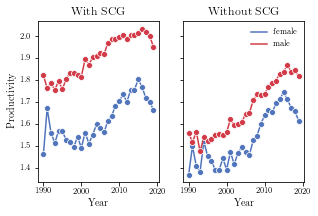

In [16]:
width = 345
fig, axs = plt.subplots(1, 2, figsize=set_size(width, fraction=1), sharey=True)

with sns.color_palette(colors):
    sns.lineplot(x='year', hue='gender', y='N', data=prod, hue_order=['female', 'male'], marker="o", ax=axs[0],
                legend=False)
    g = sns.lineplot(x='year', hue='gender', y='N', data=prod_sc, hue_order=['female', 'male'], marker="o", ax=axs[1],
                legend=True)
axs[1].set_ylabel('')
axs[0].set_xlabel('Year')
axs[0].set_title('With SCG')
axs[1].set_xlabel('Year')
axs[1].set_title('Without SCG')

g.legend(frameon=False)

axs[0].set_ylabel('Productivity');
fig.savefig('../../figures/productivity.pdf')

In [17]:
ticks = axs[0].get_xticks()

In [18]:
lims = axs[0].get_xlim()

In [19]:
prod_sc = prod_sc.rename(columns={'N': 'N_sc'})

In [20]:
pro = pd.merge(prod, prod_sc)

In [21]:
pro.groupby('gender').mean()

,year,N,N_sc
gender,,,
female,2004.5,1.618073,1.530497
male,2004.5,1.906954,1.665456


## Impact

- Mean number of cites of papers two years prior

In [22]:
dfs = []
for year in sorted(cite['t_year'].unique())[:-2]:
    chunk = cite[(cite.t_year==year) & (cite.s_year==year + 2)]
    chunk = chunk.groupby(['target', 'gender', 's_year']).size().rename('impact').reset_index()
    chunk = chunk.groupby(['gender', 's_year']).impact.mean().reset_index()
    dfs.append(chunk)
impact = pd.concat(dfs)

In [23]:
dfs = []
for year in sorted(cite['t_year'].unique())[:-2]:
    chunk = cite[(cite.super_cited_t==False) & (cite.t_year==year) & (cite.s_year==year + 2)]
    chunk = chunk.groupby(['target', 'gender', 's_year']).size().rename('impact').reset_index()
    chunk = chunk.groupby(['gender', 's_year']).impact.mean().reset_index()
    dfs.append(chunk)
impact_sc = pd.concat(dfs)

In [24]:
ticks[1:-1]

array([1990., 2000., 2010., 2020.])

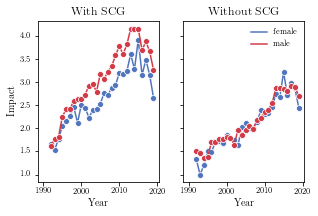

In [25]:
width = 345
fig, axs = plt.subplots(1, 2, figsize=set_size(width, fraction=1), sharey=True)

with sns.color_palette(colors):
    sns.lineplot(x='s_year', hue='gender', y='impact', data=impact, hue_order=['female', 'male'],
                 marker="o", ax=axs[0], legend=False)
    g = sns.lineplot(x='s_year', hue='gender', y='impact', data=impact_sc, hue_order=['female', 'male'],
                 marker="o", ax=axs[1], legend=True)
axs[1].set_ylabel('')
axs[0].set_xlabel('Year')
axs[0].set_title('With SCG')
axs[0].set_xlim(lims)
axs[0].set_xticks(ticks[1:-1])
axs[1].set_xlim(lims)

axs[1].set_xlabel('Year')
axs[1].set_title('Without SCG')
axs[0].set_ylabel('Impact');

g.legend(frameon=False)


fig.savefig('../../figures/impact.pdf')

In [26]:
impact_sc = impact_sc.rename(columns={'impact': 'impact_sc'})

In [27]:
imp = pd.merge(impact, impact_sc)

In [28]:
imp.groupby('gender').mean()

,s_year,impact,impact_sc
gender,,,
female,2005.5,2.666656,2.072243
male,2005.5,3.073076,2.119997


In [29]:
cite[cite.group_t=='A'].groupby('target').size().mean()

16.466355846774192

In [30]:
cite[cite.group_t=='B'].groupby('target').size().mean()

256.98919308357347

# Evolution of the gender distribution of the super cited group

In [31]:
scs = []
years = []
super_cited = []
for year in cite.t_year.unique():
    chunk = cite[cite.t_year==year]
    G_year = nx.from_pandas_edgelist(chunk,
                                     source="source",
                                     target="target",
                                     create_using=nx.DiGraph)
    degree = pd.DataFrame(G_year.in_degree(), columns=["author", "degree"])
    mu = degree.degree.mean()
    r = degree.degree.quantile(.75) - degree.degree.quantile(.25)
    scited = degree[degree.degree >= mu + 1.5 * r].author.unique()
    super_cited.append(scited)
    prop_f = all_people[all_people['Short-Id'].isin(scited)].gender.value_counts(normalize=True).loc['female']
    scs.append(prop_f)
    years.append(year)
df = pd.DataFrame({"Female proportion": scs, "Year": years})

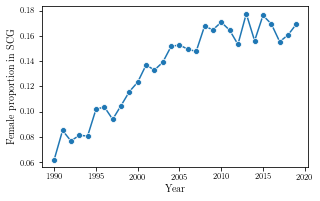

In [32]:
width = 345
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1), sharey=True)

g = sns.lineplot(x='Year', y="Female proportion", data=df, marker="o")
g.set_ylabel("Female proportion in SCG");
fig.savefig("../../figures/female_proportion_scg.pdf")